
# ** Default of Credit Card Clients **


> ## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score , plot_confusion_matrix , classification_report, confusion_matrix



import warnings
from sklearn.exceptions import ConvergenceWarning

> ## Load dataset

In [2]:
df =pd.read_excel('default of credit card clients.xls', skiprows=[0])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


> ## EDA + Data preparation

In [3]:
df.shape

(30000, 25)

 25 features , 30000 observations 

In [4]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

###### Check missing values

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###### check duplicated observations

In [6]:
df.duplicated().sum() 

0

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

###### Summary Statistics

In [8]:
# Summary Statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The average value of the credit card limit is 167,484. The standard deviation is unusually large, with a maximum value of 1,000,000.

The average age is 35, with a standard deviation of 9.2
###### ! The ID column is useless in our DATASET. 

 rename variable 'PAY_0' to 'PAY_1'  and 'default.payment.next.month' to 'Default'

In [9]:
df.rename(columns={'default payment next month': 'def', 
                        'PAY_0': 'PAY_1'}, inplace = True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


 ## - Label distribution

def
0    23364
1     6636
Name: count, dtype: int64


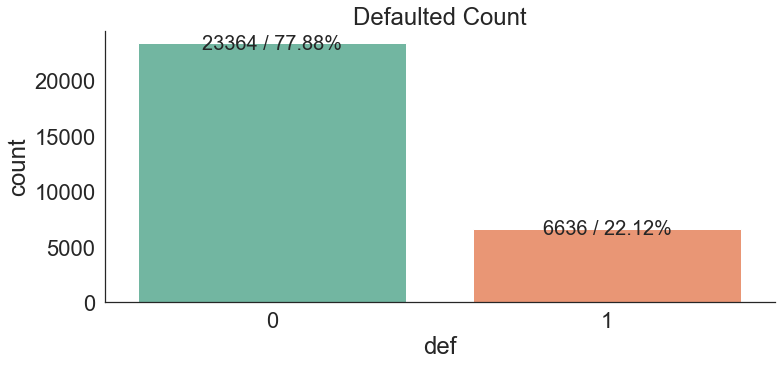

In [10]:
y = df["def"].value_counts()
print(y)

sns.set(font_scale=1)
total_cnt = df['def'].count()
rcParams['figure.figsize'] = 12,5
sns.set(font_scale= 2)
sns.set_style("white")
ax = sns.countplot(x="def" , data=df, palette = 'Set2')
ax.set_title('Defaulted Count')

for p in ax.patches:
    x, height , width = p.get_x() , p.get_height() , p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.2f}%', va='center', ha='center', size=20)

sns.despine()

We have chosen this histogram to show the number of customers who have defaulted and those who have not. 

It's easy to see that the number of customers with Default = 0 is higher than the number with Default = 1.


#### most customers **( 77.9% )** belong to the (no-default) class 

Since we have an imbalanced data we will explore our data furthermore and found out the illogical scenarios that could  introduce noise or bias into our model to we ensure that our dataset is cleaner and more representative before decreasing randomly the size of the majority class.

In [11]:
df = df.drop(axis=1, columns='ID')

In [12]:
df.duplicated().sum() 

35

After deleting the "id" column, we got 35 duplicated obs that we need to eliminate now.






In [13]:
df=df.drop_duplicates()
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


 ## - EDUCATION

EDUCATION
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64


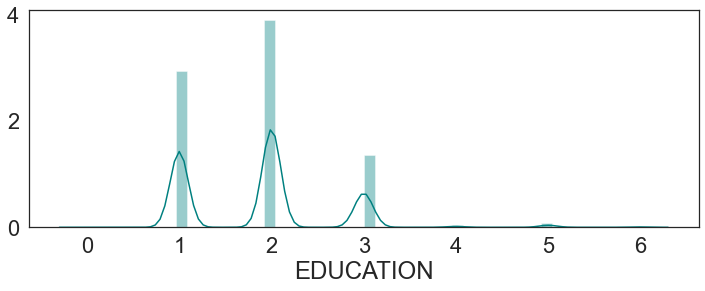

In [14]:
print(df['EDUCATION'].value_counts())

plt.figure(figsize=(12,4))
sns.distplot(df['EDUCATION'], color="teal")
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) / no description for 0,
unknown means it could be any other value

* step 1 : group  5,0  and 6 (as unknown)

In [15]:
unkown = (df['EDUCATION'] == 6)|(df['EDUCATION'] == 0)
unkown
df[unkown]['def'].value_counts()


def
0    57
1     8
Name: count, dtype: int64

In [16]:
df.loc[unkown, 'EDUCATION'] = 5
df['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
5      345
4      123
Name: count, dtype: int64

Out of 29965  rows, only 345 rows have the education type labeled as "unknown". Given this small percentage, the impact on our analysis or model training would be minimal if these rows were excluded. Moreover, since "unknown" doesn't provide meaningful information and could potentially represent any education type, keeping these rows might introduce noise or bias into our analysis.

By dropping these rows, we ensure that our dataset is cleaner and more representative of the meaningful categories. This can lead to more accurate results and more reliable insights from our data analysis or machine learning model.

In [17]:
df=df[df['EDUCATION']!=5]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [18]:
df.duplicated().sum() 

0

In [19]:
df['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
4      123
Name: count, dtype: int64

 ### -  *MARRIAGE*


MARRIAGE
2    15787
1    13461
3      318
0       54
Name: count, dtype: int64


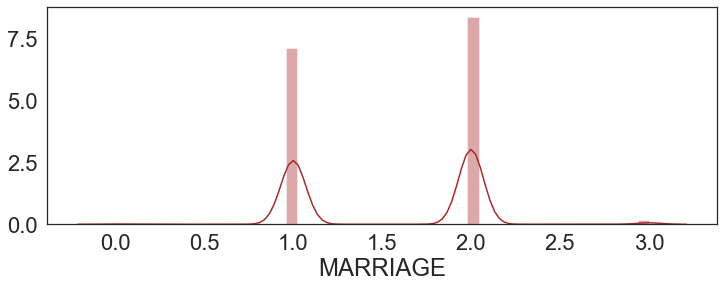

In [20]:
print(df['MARRIAGE'].value_counts())
plt.figure(figsize=(12,4))
sns.distplot(df['MARRIAGE'], color="brown")
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others) no description for 0 so as we mentionned in education feature this could potentially represent any marital status, keeping these rows might introduce noise or bias into our analysis

In [21]:
df=df[df['MARRIAGE']!=0].reset_index(drop=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29562,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29563,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29564,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


 ### -  *SEX*

SEX
2    17834
1    11732
Name: count, dtype: int64


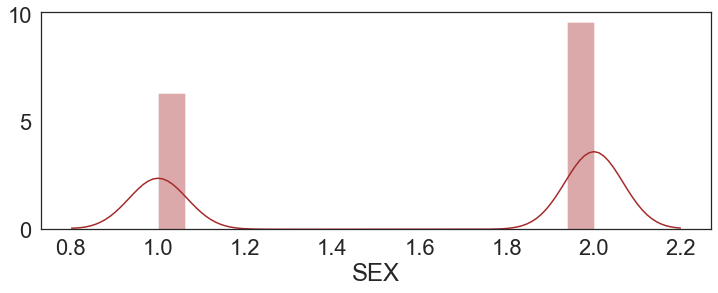

In [22]:
print(df['SEX'].value_counts())

plt.figure(figsize=(12,4))
sns.distplot(df['SEX'], color="brown")
plt.show()

 ### -  *AGE*

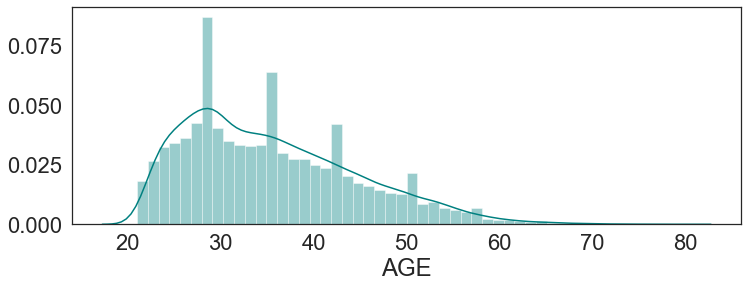

In [23]:
plt.figure(figsize=(12,4))
sns.distplot(df['AGE'], color="teal")
plt.show()

To get a good idea of the age range in our dataset, we used this figure, which shows that most customers are between 25 and 40 years old.

In [24]:
df['AgeBin'] = pd.cut(df['AGE'],[20,  25, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

AgeBin
(25, 40]    17612
(40, 50]     5898
(20, 25]     3824
(50, 60]     1963
(60, 80]      269
Name: count, dtype: int64


#### + *AGE - DEFAULT*

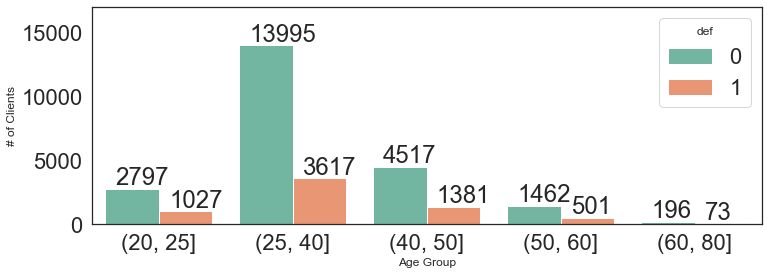

In [25]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="def", palette = 'Set2', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,17000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

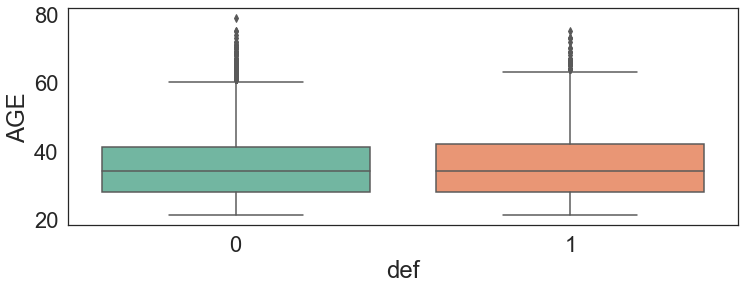

In [26]:
plt.figure(figsize=(12,4))

sns.boxplot(x='def',y='AGE',data=df,palette='Set2')

#### + *AGE - MARRIAGE - DEF*

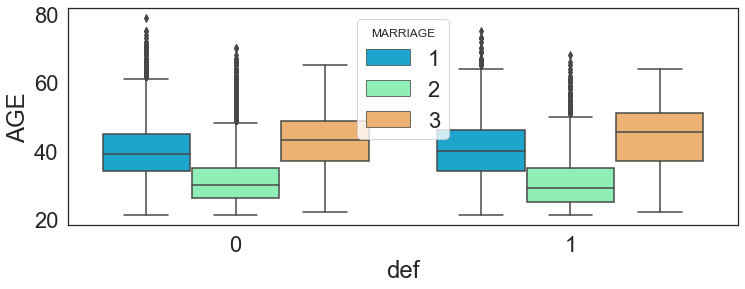

In [27]:
plt.figure(figsize=(12,4))

sns.boxplot(x='def',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")

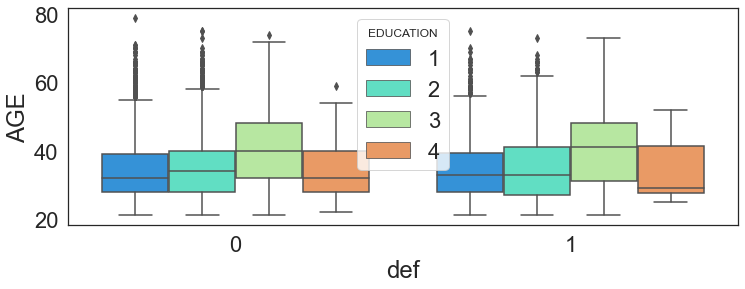

In [28]:
plt.figure(figsize=(12,4))

sns.boxplot(x='def',hue='EDUCATION', y='AGE',data=df,palette="rainbow" )

In [29]:
df = df.drop(axis=1, columns='AgeBin')

 ### -  *PAY_X*

In [30]:
print(df['PAY_1'].value_counts())

PAY_1
 0    14499
-1     5629
 1     3641
-2     2699
 2     2639
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: count, dtype: int64


In [31]:
print(df['PAY_1'].value_counts())

PAY_1
 0    14499
-1     5629
 1     3641
-2     2699
 2     2639
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: count, dtype: int64


have 0 (undocumented) and a maximum equal to 8. So, it is likely that these attributes need to be rescaled (+1)


PAY_[i] = -2 in some documents means that there are no transactions made by the customers.

In [32]:
# to facilitate column manipulation
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

PAY_AMT = getColumnsNames('PAY_AMT')
PAY_X = getColumnsNames('PAY_')
BILL_AMT = getColumnsNames('BILL_AMT') 

In [33]:
PAY_X

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [34]:
for p in PAY_X:
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

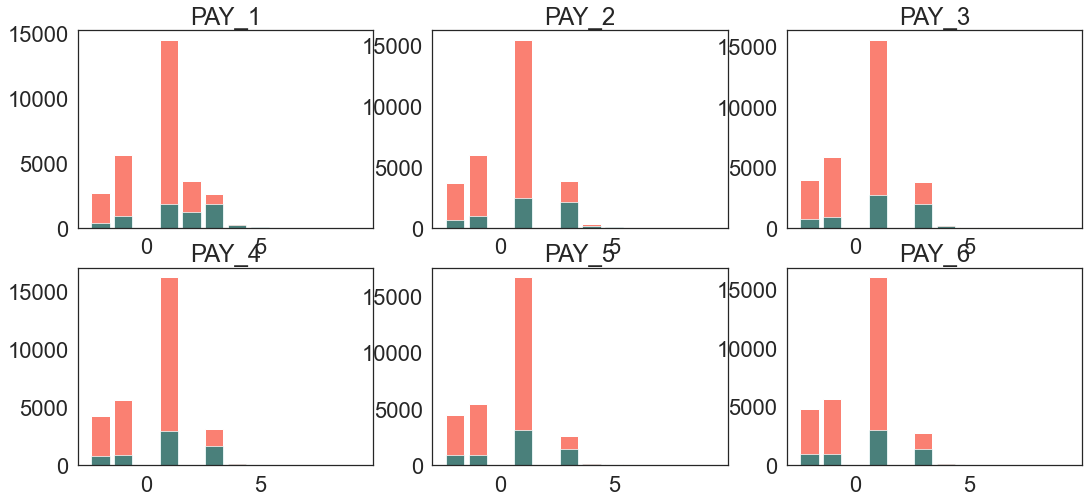

In [35]:
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(PAY_X)):
    row,col = int(i/3), i%3
    d  = df[PAY_X[i]].value_counts()
    x = df[PAY_X[i]][(df['def']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='salmon')
    ax[row,col].bar(x.index, x, align='center', color='teal', alpha=0.7)
    ax[row,col].set_title(PAY_X[i])

most observations belong to  [-2, 3].

In [36]:
for col in PAY_X:
    df[col] = df[col].apply(lambda x: 3 if x > 3 else x)
print(df['PAY_1'].value_counts())

PAY_1
 1    14499
-1     5629
 2     3641
 3     3098
-2     2699
Name: count, dtype: int64


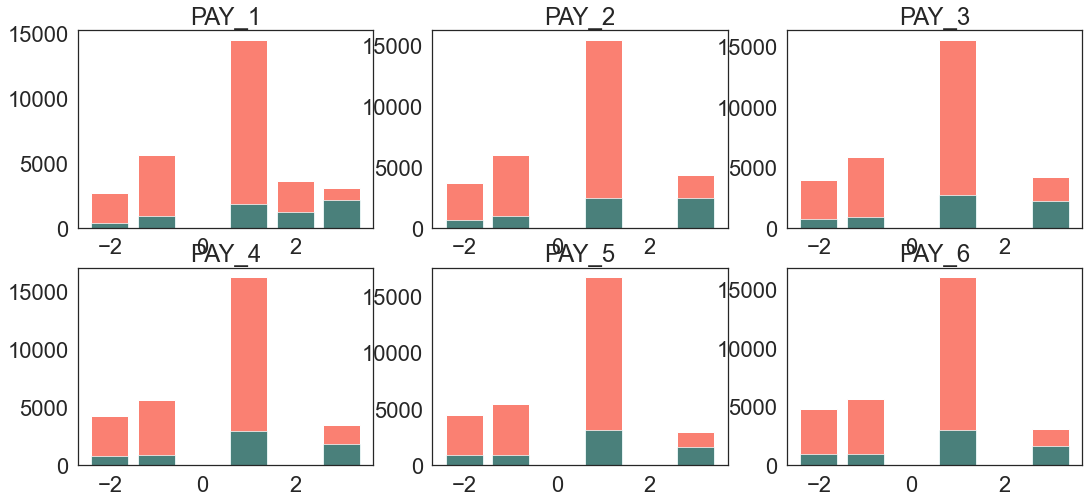

In [37]:
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(PAY_X)):
    row,col = int(i/3), i%3
    d  = df[PAY_X[i]].value_counts()
    x = df[PAY_X[i]][(df['def']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='salmon')
    ax[row,col].bar(x.index, x, align='center', color='teal', alpha=0.7)
    ax[row,col].set_title(PAY_X[i])

 ### -  *BILL_AMTX - PAY_AMTX - PAY_X*

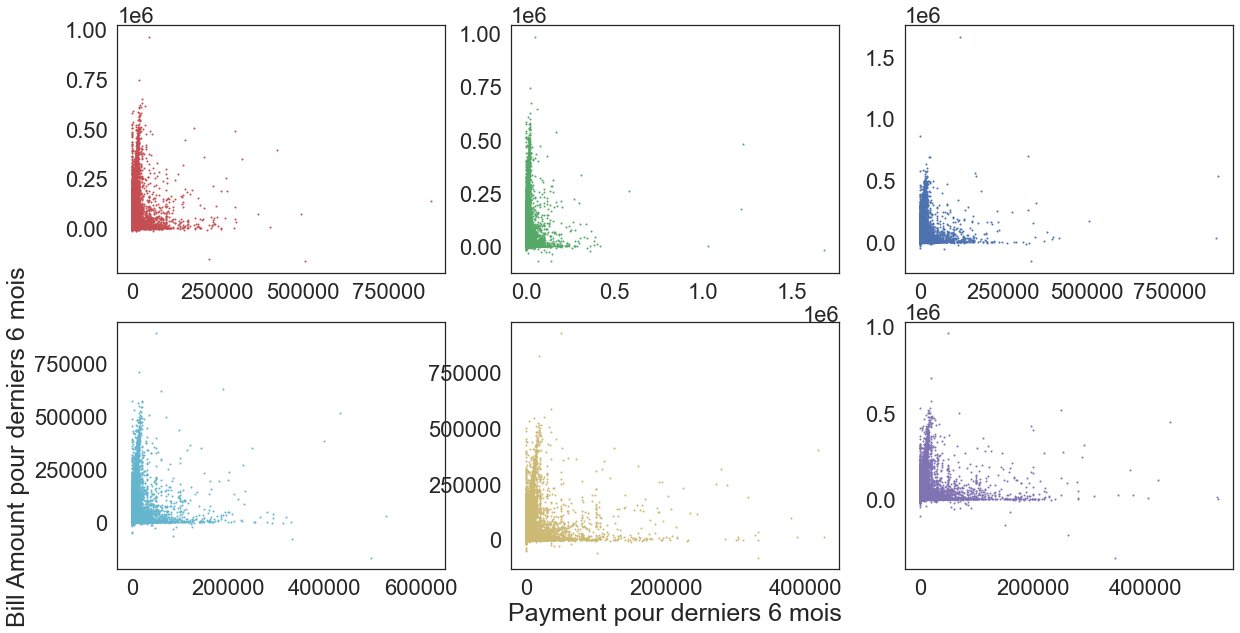

In [38]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df['PAY_AMT1'], y=df['BILL_AMT1'], c='r', s=1)

plt.subplot(232)
plt.scatter(x=df['PAY_AMT2'], y=df['BILL_AMT2'], c='g', s=1)

plt.subplot(233)
plt.scatter(x=df['PAY_AMT3'], y=df['BILL_AMT3'], c='b', s=1)

plt.subplot(234)
plt.scatter(x=df['PAY_AMT4'], y=df['BILL_AMT4'], c='c', s=1)
plt.ylabel("Bill Amount pour derniers 6 mois", fontsize=25)

plt.subplot(235)
plt.scatter(x=df['PAY_AMT5'], y=df['BILL_AMT5'], c='y', s=1)
plt.xlabel("Payment pour derniers 6 mois", fontsize=25)

plt.subplot(236)
plt.scatter(x=df['PAY_AMT6'], y=df['BILL_AMT6'], c='m', s=1)

plt.show()

* Payments Without Bills

In [39]:
pay_no_bill=df[((df[PAY_AMT]>0).any(axis=1))&((df[BILL_AMT]==0).all(axis=1))]
pay_no_bill['def'].value_counts()

def
0    53
1    18
Name: count, dtype: int64

In [40]:
pay_no_bill

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
291,130000,1,1,2,29,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1500,0
298,440000,2,1,2,36,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,162000,0,0
598,180000,2,2,2,31,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1576,0
1147,470000,1,3,1,39,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,789,0
2612,200000,2,1,1,42,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,665,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27486,80000,2,2,2,26,2,-2,-2,-2,-2,...,0,0,0,0,3100,0,0,0,0,0
27841,100000,2,1,1,37,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,150,1
28697,300000,2,3,1,50,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,4886,1
28739,360000,2,3,1,56,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,253,0


If no bills were issued for a given month, it doesn't make sense to have a payment. 

In [41]:
df = df.drop(pay_no_bill.index).reset_index(drop=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,3,3,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,1,-1,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29490,220000,1,3,1,39,1,1,1,1,1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29491,150000,1,3,2,43,-1,-1,-1,-1,1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29492,30000,1,2,2,37,3,3,3,-1,1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29493,80000,1,3,1,41,2,-1,1,1,1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


* Bills Without Payments or Transactions:

In [42]:
w=df[((df[PAY_AMT]==0).all(axis=1))&((df[BILL_AMT]>0).all(axis=1))&((df[PAY_X]==-2).all(axis=1))]
w['def'].value_counts()

Series([], Name: count, dtype: int64)

-> no bills without payment or transactions

* No Activity on the Account

In [43]:
xx=df[((df[PAY_AMT]==0).all(axis=1))&((df[BILL_AMT]==0).all(axis=1))]
xx['def'].value_counts()

def
0    460
1    294
Name: count, dtype: int64

In [44]:
xx

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
18,360000,2,1,1,49,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19,180000,2,1,2,29,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
45,210000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
77,240000,2,2,2,44,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
119,450000,1,1,1,40,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29330,340000,1,1,2,33,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29406,140000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29468,230000,1,2,1,35,2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29474,180000,1,1,1,32,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


we detect 754 observations of all the BILL_AMTX and PAY_AMTX features are 0 which means that No Activity on the Account so logically the customer haven't used their credit card during this period, resulting in no billed amounts. 

In [45]:
for x in PAY_X : 
    print(xx[x].value_counts())

PAY_1
 2    470
-2    284
Name: count, dtype: int64
PAY_2
-2    754
Name: count, dtype: int64
PAY_3
-2    754
Name: count, dtype: int64
PAY_4
-2    754
Name: count, dtype: int64
PAY_5
-2    754
Name: count, dtype: int64
PAY_6
-2    754
Name: count, dtype: int64


In [46]:
illo = xx[((xx[PAY_X]!=-2).any(axis=1))]

In [47]:
df = df.drop(illo.index).reset_index(drop=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,3,3,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,1,-1,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29020,220000,1,3,1,39,1,1,1,1,1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29021,150000,1,3,2,43,-1,-1,-1,-1,1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29022,30000,1,2,2,37,3,3,3,-1,1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29023,80000,1,3,1,41,2,-1,1,1,1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


* No Transactions but High Payments:

In [48]:
no_trans = df[(df[PAY_X] == -2).any(axis=1)]
no_con1 =  no_trans[(df[PAY_AMT]>0).all(axis=1)]
no_con1

<ipython-input-48-a5d4f8bfb4d2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_con1 =  no_trans[(df[PAY_AMT]>0).all(axis=1)]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
31,500000,2,2,1,54,-2,-2,-2,-2,-2,...,7521,71439,8981,4152,22827,7521,71439,981,51582,0
96,380000,2,1,2,30,-2,-2,-1,1,1,...,32891,33564,34056,223,33178,1171,1197,1250,5000,0
122,30000,2,1,2,23,2,-2,-2,-2,-1,...,-27,13744,5906,5645,3508,27,13771,5911,3024,0
134,170000,1,2,2,29,-2,-2,-2,-2,-2,...,10000,9983,15846,10000,10000,10000,9983,15863,10000,0
157,370000,1,1,2,50,-2,-2,-2,-2,-2,...,15398,4792,13453,15383,8204,15413,4792,13453,4699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28906,340000,1,2,2,36,-2,-2,-2,-2,-2,...,12062,3894,7957,14594,15047,12064,3894,7957,18191,0
28964,320000,1,1,1,44,-2,-2,-2,-2,-2,...,2975,2029,888,6818,13482,2975,2029,888,1332,0
29000,220000,1,2,1,41,1,1,-1,-1,-2,...,5924,1759,1824,8840,6643,5924,1759,1824,7022,0
29008,20000,1,2,1,44,-2,-2,-2,-2,-2,...,2882,9235,1719,2890,2720,2890,9263,1824,1701,0


In [49]:
no_con1['def'].value_counts()

def
0    1109
1      99
Name: count, dtype: int64

PAY_[i] = -2 means that there are no transactions made by the customers or we notice that with a PAY_[i]=-2 there are values of ['PAY_AMTi']!=0  which is illogical

In [50]:
df = df.drop(no_con1.index).reset_index(drop=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,3,3,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,1,-1,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27812,220000,1,3,1,39,1,1,1,1,1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
27813,150000,1,3,2,43,-1,-1,-1,-1,1,...,8979,5190,0,1837,3526,8998,129,0,0,0
27814,30000,1,2,2,37,3,3,3,-1,1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
27815,80000,1,3,1,41,2,-1,1,1,1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


*  Negative Bill with No Payment

In [51]:
neg_bill=df[(df[BILL_AMT] < 0).all(axis=1) & (df[PAY_AMT] == 0).all(axis=1)]
neg_bill

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
102,360000,1,2,1,35,2,-2,-2,-2,-2,...,-103,-103,-103,0,0,0,0,0,0,0
159,50000,2,1,2,24,2,-2,-2,-2,-2,...,-2898,-3272,-3272,0,0,0,0,0,0,1
201,240000,2,2,1,36,2,-2,-2,-2,-2,...,-946,-946,-946,0,0,0,0,0,0,1
298,180000,1,2,2,29,2,-2,-2,-2,-2,...,-2,-2,-2,0,0,0,0,0,0,0
512,220000,2,1,1,41,2,-2,-2,-2,-2,...,-65,-65,-200,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,40000,1,2,1,55,2,-2,-2,-2,-2,...,-1320,-1710,-2100,0,0,0,0,0,0,1
25841,50000,2,1,2,26,2,-2,-2,-2,-2,...,-18,-18,-18,0,0,0,0,0,0,0
25973,170000,2,2,1,29,-2,-2,-2,-2,-2,...,-807,-1169,-1531,0,0,0,0,0,0,0
26729,360000,2,1,1,36,2,-2,-2,-2,-2,...,-1,-1,-1,0,0,0,0,0,0,0


Normally, if a bill is negative due to a refund or overpayment, there should have been a previous payment or a correction, but if no payment was made, the negative bill might indicate a data error.

In [52]:
df = df.drop(neg_bill.index).reset_index(drop=True)

In [53]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,20000,2,2,1,24,3,3,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,1,-1,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,220000,1,3,1,39,1,1,1,1,1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
27749,150000,1,3,2,43,-1,-1,-1,-1,1,...,8979,5190,0,1837,3526,8998,129,0,0,0
27750,30000,1,2,2,37,3,3,3,-1,1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
27751,80000,1,3,1,41,2,-1,1,1,1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Correlation

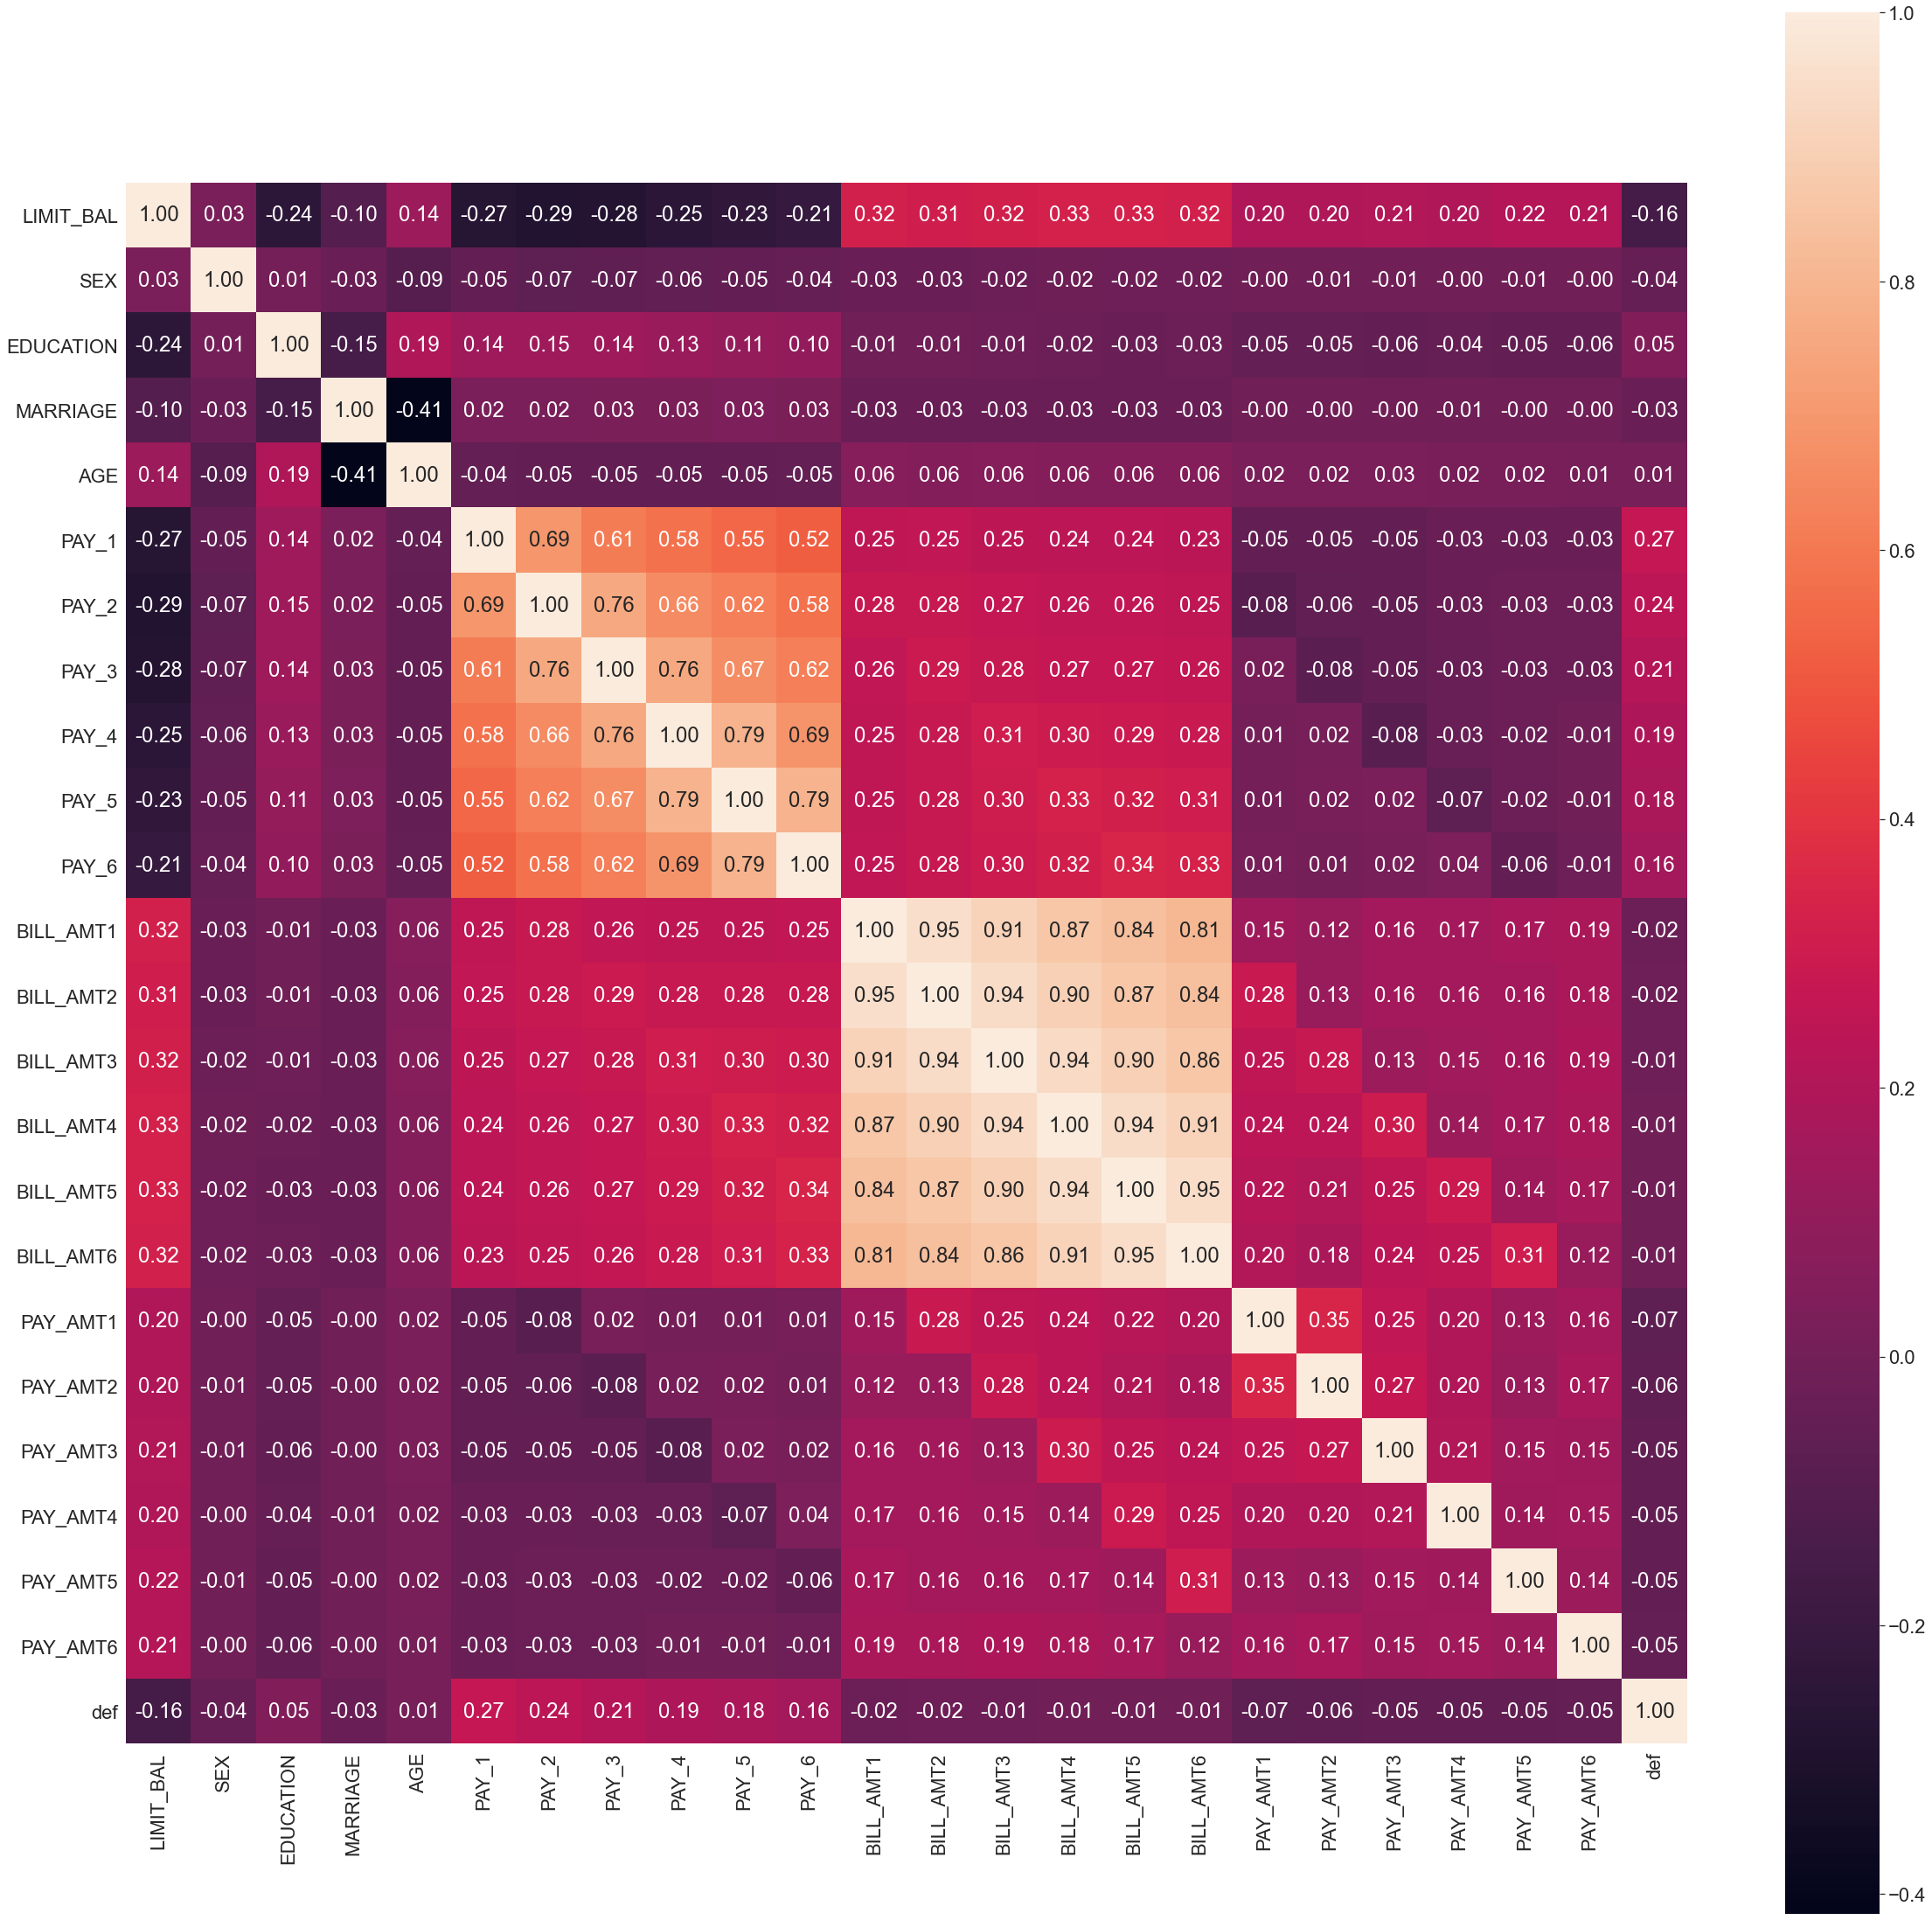

In [54]:
correlation = df.corr()
plt.subplots(figsize=(40,40))
sns.heatmap( correlation, square=True, annot=True, fmt=".2f" )  

We observe that the variables PAY_1-6 are the most explanatory for our label "default." 

To better visualize the dependency between the variables, we created covariance matrices for the variables located at the center of the matrix, which appear to have a strong correlation.

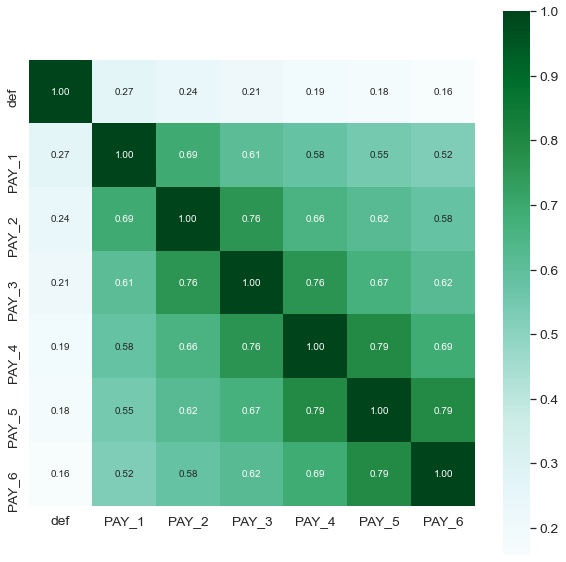

In [55]:
k = 7 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'def')['def'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='BuGn')
plt.show()

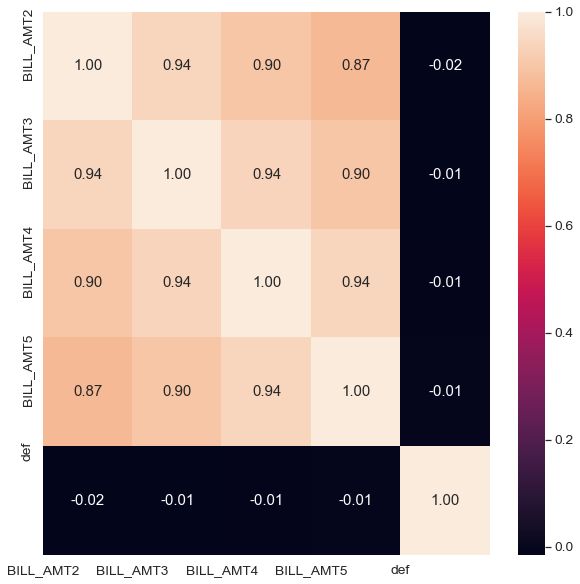

In [56]:

y= df.iloc[:, :-8]
y=y.iloc[:,12:]

y['def']=df['def']
corr = y.corr()
fig, ax = plt.subplots(figsize=(10,10))

colormap = sns.diverging_palette(220, 10) 
sns.heatmap(corr,  cmap='rocket',annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)))
plt.yticks(range(len(corr.columns)))

plt.show()

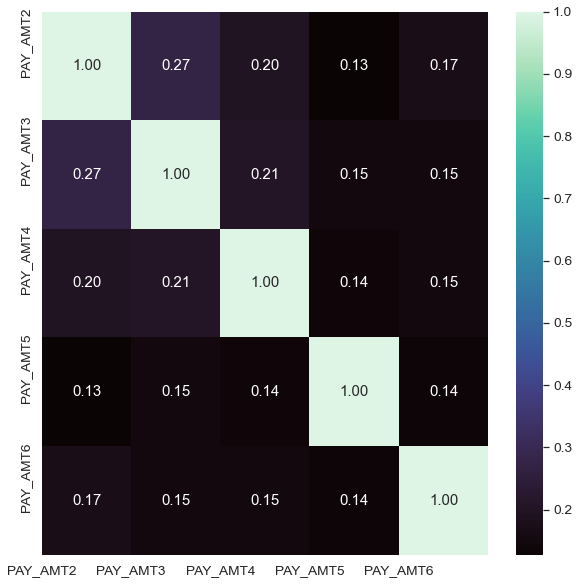

In [57]:

x= df.iloc[:, 18:]
z=df.iloc[:, 24:]
x=x.iloc[:,:-1]
corr = x.corr()

fig, ax = plt.subplots(figsize=(10,10))

colormap = sns.diverging_palette(220, 10) 
sns.heatmap(corr,  cmap='mako',annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)))
plt.yticks(range(len(corr.columns)))

plt.show()

###  Normality Check

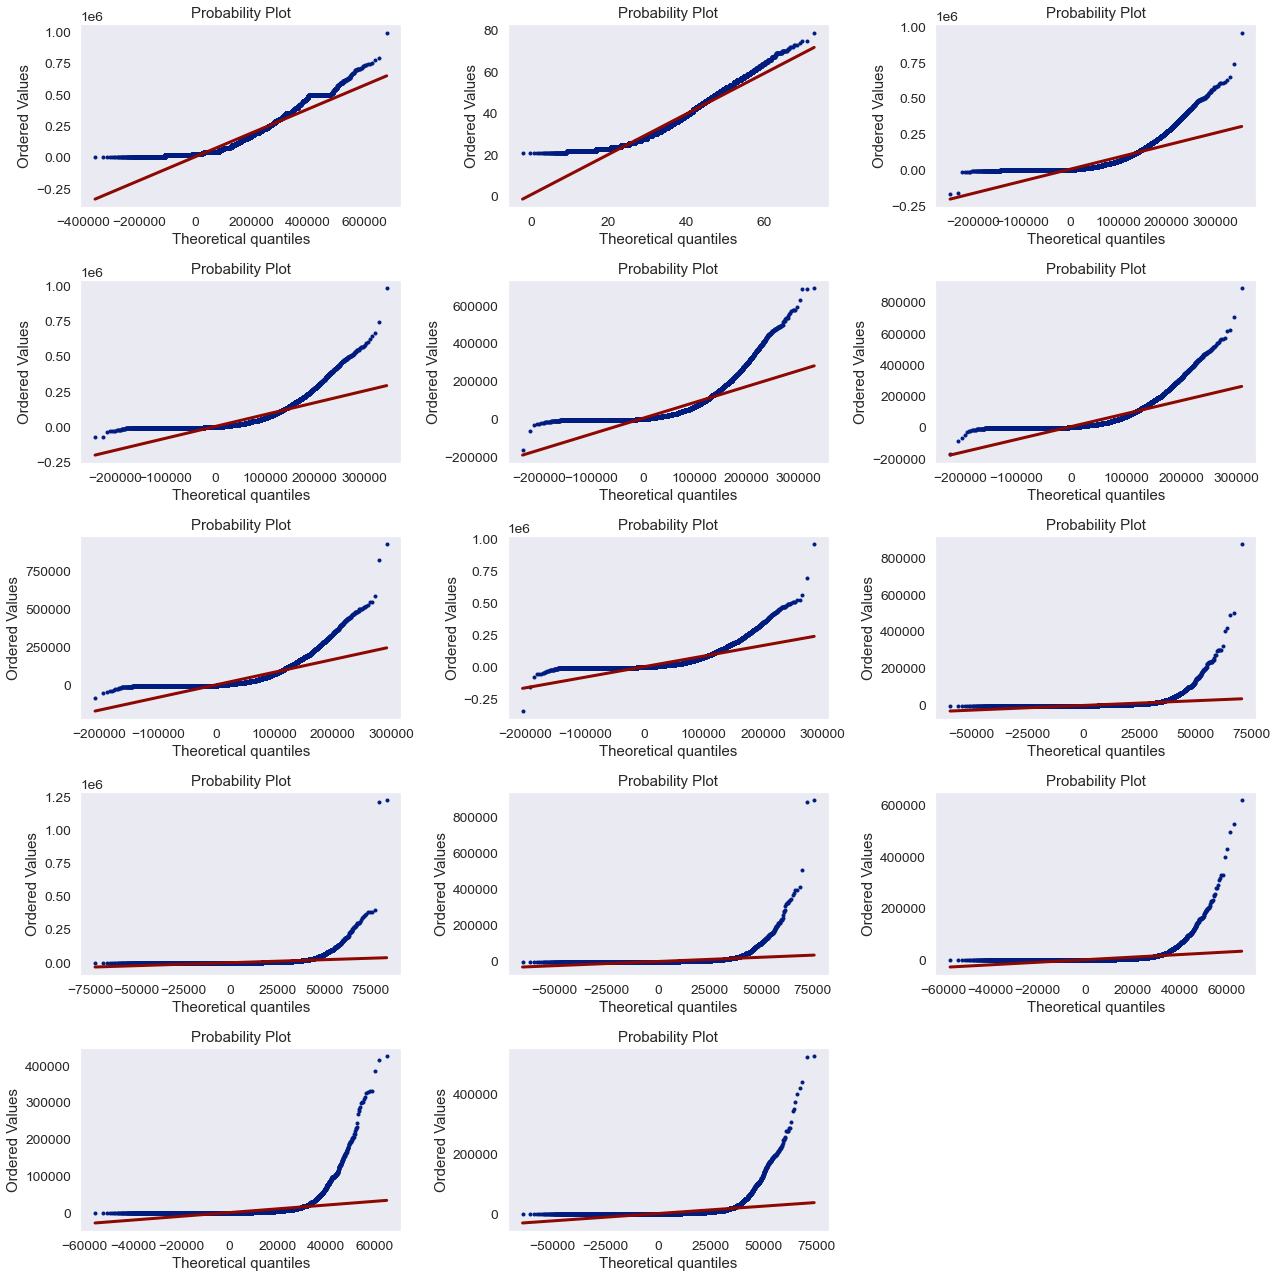

In [58]:
# Check gaussian distribution

sns.set_color_codes('dark')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f], 
                   dist='norm', 
                   sparams=(df[f].mean(), df[f].std()), 
                   plot=axs[i,j])
    axs[i,j].get_lines()[0].set_marker('.')
    
    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
plt.show()

- ###  One-hot encoding 

In [59]:
df=pd.concat([pd.get_dummies(df['EDUCATION'], prefix='EDU',dtype=int), 
                  pd.get_dummies(df['MARRIAGE'], prefix='MARR',dtype=int),
                  df],axis=1)
df.drop(['EDUCATION', 'MARRIAGE'], axis=1, inplace=True)

In [60]:
df

,EDU_1,EDU_2,EDU_3,EDU_4,MARR_1,MARR_2,MARR_3,LIMIT_BAL,SEX,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,0,1,0,0,1,0,0,20000,2,24,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,0,1,0,120000,2,26,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,0,1,0,90000,2,34,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,0,1,0,0,50000,2,37,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,0,1,0,0,1,0,0,50000,1,57,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,0,0,1,0,1,0,0,220000,1,39,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
27749,0,0,1,0,0,1,0,150000,1,43,...,8979,5190,0,1837,3526,8998,129,0,0,0
27750,0,1,0,0,0,1,0,30000,1,37,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
27751,0,0,1,0,1,0,0,80000,1,41,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [61]:
df.rename(columns={'EDU_1': 'Grad_school', 
                        'EDU_2': 'Uni', 'EDU_3': 'High_school', 'EDU_4':'Edu_others', 'MARR_1':'Married','MARR_2':'Single', 'MARR_3':'marriage_oth'}, inplace = True)
df

,Grad_school,Uni,High_school,Edu_others,Married,Single,marriage_oth,LIMIT_BAL,SEX,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,0,1,0,0,1,0,0,20000,2,24,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,0,1,0,120000,2,26,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,0,1,0,90000,2,34,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,0,1,0,0,50000,2,37,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,0,1,0,0,1,0,0,50000,1,57,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,0,0,1,0,1,0,0,220000,1,39,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
27749,0,0,1,0,0,1,0,150000,1,43,...,8979,5190,0,1837,3526,8998,129,0,0,0
27750,0,1,0,0,0,1,0,30000,1,37,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
27751,0,0,1,0,1,0,0,80000,1,41,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In the case of one-hot encoding, as the sum of the encoded features always equals 1, it results in perfect multicollinearity. So we can drop the other type 

In [62]:
df.drop(['Edu_others','marriage_oth'],axis=1, inplace=True)
df

,Grad_school,Uni,High_school,Married,Single,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,0,1,0,1,0,20000,2,24,3,3,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,1,120000,2,26,-1,3,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,1,90000,2,34,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,50000,2,37,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,0,1,0,1,0,50000,1,57,-1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,0,0,1,1,0,220000,1,39,1,1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
27749,0,0,1,0,1,150000,1,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
27750,0,1,0,0,1,30000,1,37,3,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
27751,0,0,1,1,0,80000,1,41,2,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


def
0    21480
1     6273
Name: count, dtype: int64


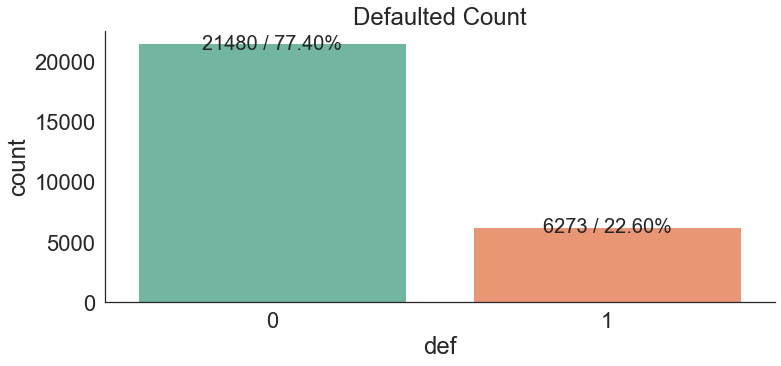

In [63]:
y = df["def"].value_counts()
print(y)

sns.set(font_scale=1)
total_cnt = df['def'].count()
rcParams['figure.figsize'] = 12,5
sns.set(font_scale= 2)
sns.set_style("white")
ax = sns.countplot(x="def" , data=df, palette = 'Set2')
ax.set_title('Defaulted Count')

for p in ax.patches:
    x, height , width = p.get_x() , p.get_height() , p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.2f}%', va='center', ha='center', size=20)

    
sns.despine()

### Undersampling

In [64]:
l = df['def']
f= df.iloc[: , :-1]
print('shape de features '+ str(f.shape))
print('shape du label '+ str(l.shape))

f_train , f_test, l_train, l_test = train_test_split(f, l, test_size=0.25, random_state=5)
print('shape de f_train ' + str(f_train.shape))
print('shape de f_test ' + str(f_test.shape))

l_test_counts = l_test.value_counts()
l_test_percentage = (l_test_counts / len(l_test)) * 100

# Calculate the value counts and percentages for l_train
l_train_counts = l_train.value_counts()
l_train_percentage = (l_train_counts / len(l_train)) * 100

# Print the results
print("l_test count:\n", l_test_counts)
print("\nl_test percentage:\n", l_test_percentage)
print("\nl_train count:\n", l_train_counts)
print("\nl_train percentage:\n", l_train_percentage)

undersampler = RandomUnderSampler()
f_train, l_train = undersampler.fit_resample(f_train, l_train)

shape de features (27753, 26)
shape du label (27753,)
shape de f_train (20814, 26)
shape de f_test (6939, 26)
l_test count:
 def
0    5410
1    1529
Name: count, dtype: int64

l_test percentage:
 def
0    77.965125
1    22.034875
Name: count, dtype: float64

l_train count:
 def
0    16070
1     4744
Name: count, dtype: int64

l_train percentage:
 def
0    77.207649
1    22.792351
Name: count, dtype: float64


- ### Features Scaling

In [65]:
scaler = StandardScaler()

f_train = scaler.fit_transform(f_train)
f_test = scaler.fit_transform(f_test)

> ## Modeling

 Les algorithmes qu'on va appliquer dans notre travail sont : 
- K-nearest neighbor
- Support vector machine
- Logistic regression
- decission tree 
- Random Forest 
- Adaboost

In [66]:
final_report = []
def prepare_metrics(model , l_actual,l_predicted):
    #print the report
    print ("\n Classification report : \n",classification_report(l_actual,l_predicted))
    
     # Plot confusion matrix 
    conf=confusion_matrix(l_actual,l_predicted)
    class_names=[0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(conf), annot=True, cmap=plt.cm.Greens ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # get the final report 
    final_report.append({
        'Model': model,
        'Accuracy': accuracy_score( l_actual,l_predicted),
        'F1 Score': f1_score( l_actual,l_predicted)
    })

### K-nearest neighbor

Minimum error:- 0.2595474852284191 at K = 25


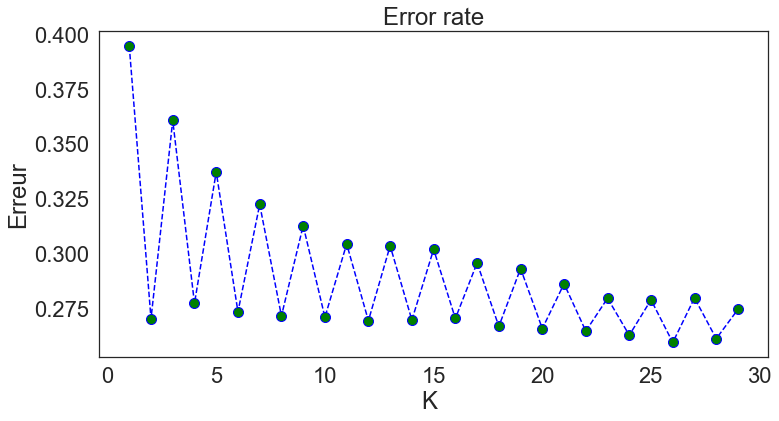

In [67]:
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(f_train, l_train)
    pred_iknn = knn_model.predict(f_test)
    error.append(np.mean(pred_iknn != l_test))
    # Append: add an object to the end of the list
   # mean: retourne= la moyenne arrithmétique des fausses prédictions (somme des erreurs sur total)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title("Error rate")
plt.xlabel('K ')
plt.ylabel('Erreur')
print("Minimum error:-",min(error),"at K =",error.index(min(error)))

In [68]:
knn = KNeighborsClassifier(error.index(min(error)))
knn_model = knn.fit(f_train, l_train)
y_pred_knn = knn_model.predict(f_test)

Classification report : 


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.77      0.82      5410
           1       0.42      0.57      0.48      1529

    accuracy                           0.73      6939
   macro avg       0.64      0.67      0.65      6939
weighted avg       0.77      0.73      0.74      6939



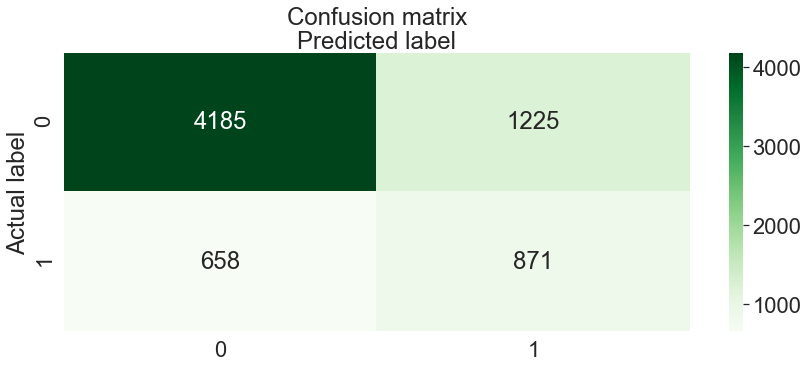

In [69]:
prepare_metrics('knn' , l_test,y_pred_knn)

### SVM 

In [70]:
SVM=SVC(kernel='rbf')

In [71]:
SVM.fit(f_train, l_train)
y_pred = SVM.predict(f_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5410
           1       0.48      0.56      0.52      1529

    accuracy                           0.77      6939
   macro avg       0.67      0.69      0.68      6939
weighted avg       0.78      0.77      0.78      6939



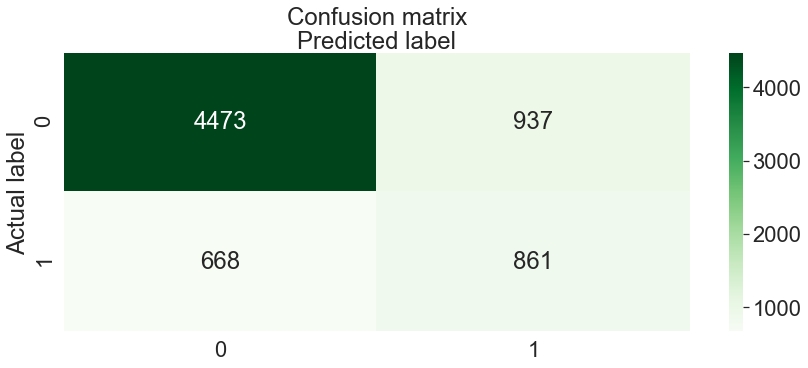

In [72]:
prepare_metrics('SVM' , l_test,y_pred)

### Logistic Regression

The LogisticRegression class in Scikit-learn implements the parameter C as the inverse of the regularization term 
. Consequently, we can specify a stronger regularization by adopting smaller values of C.

Therefore, we perform cross-validated grid-search over the following parameter grid to find the best configuration for our logistic regression model to use to predict the test set.

In [73]:

param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'class_weight': [None, 'balanced']
}


logreg = LogisticRegression(solver = 'saga' ,max_iter=10000 , tol=1e-4)

gsv = GridSearchCV(logreg,param_grid,cv=5, scoring='accuracy')


best_model = gsv.fit(f_train, l_train) 

logreg_pred = best_model.best_estimator_.predict(f_test)    # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("best estimator",gsv.best_estimator_)


Best HyperParameter:  {'C': 0.1, 'class_weight': None}
best estimator LogisticRegression(C=0.1, max_iter=10000, solver='saga')


In [74]:
best_model

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced']},
             scoring='accuracy')

In [75]:
print("Best Accuracy :",gsv.best_score_)

Best Accuracy : 0.649767004970968



 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5410
           1       0.48      0.56      0.52      1529

    accuracy                           0.77      6939
   macro avg       0.67      0.69      0.68      6939
weighted avg       0.78      0.77      0.78      6939



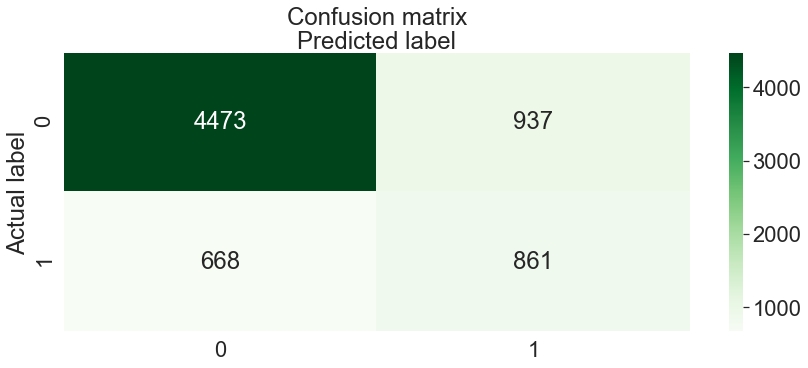

In [76]:
prepare_metrics(' Logistic Regression' , l_test,y_pred)

### Decision Tree

In [77]:
dt = DecisionTreeClassifier()
dt.fit(f_train, l_train)
y_pred = dt.predict(f_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.64      0.72      5410
           1       0.31      0.57      0.40      1529

    accuracy                           0.62      6939
   macro avg       0.57      0.60      0.56      6939
weighted avg       0.72      0.62      0.65      6939



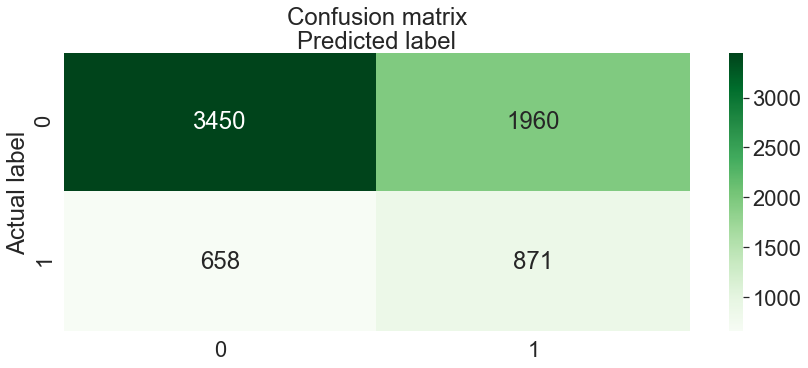

In [78]:
prepare_metrics('Decision Tree' , l_test,y_pred)

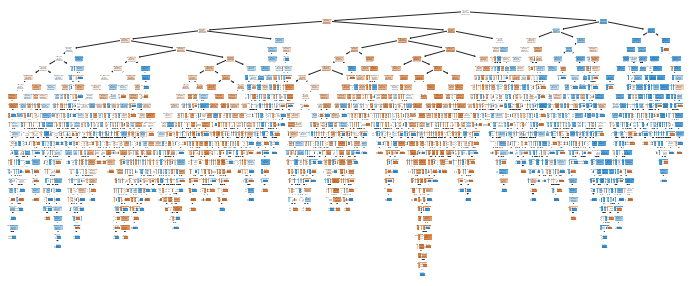

In [79]:
plot_tree(dt, feature_names= list(f.columns),filled=True)
plt.show()

### Random Forest

In [80]:
estimators = [10,50,80,100,150,200,250,300,350]

rf = RandomForestClassifier()
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(f_train, l_train)             
y_predict = best_model.best_estimator_.predict(f_test)   

print("Best HyperParameter: ",gsv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best HyperParameter:  {'n_estimators': 150}



 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      5410
           1       0.43      0.64      0.51      1529

    accuracy                           0.73      6939
   macro avg       0.65      0.70      0.66      6939
weighted avg       0.78      0.73      0.75      6939



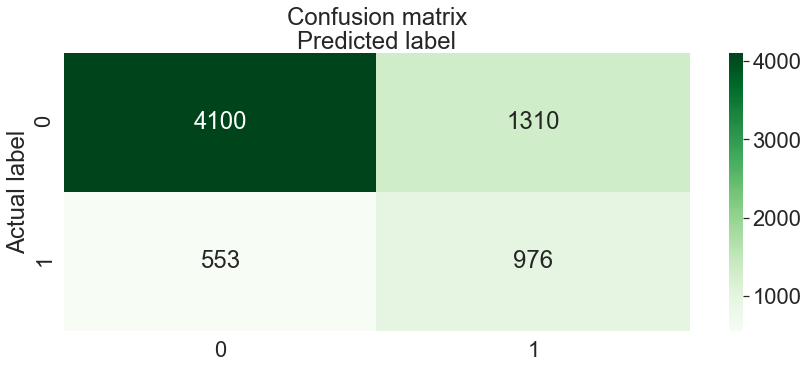

In [81]:
prepare_metrics('Random Forest' , l_test,y_predict)

### Adaboost

In [82]:
estimators = [10,50,80,100,150,200,250,300,350]

adab = AdaBoostClassifier()
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(adab,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(f_train, l_train)             
y_predict = best_model.best_estimator_.predict(f_test)   

print("Best HyperParameter: ",gsv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best HyperParameter:  {'n_estimators': 50}



 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      5410
           1       0.46      0.60      0.52      1529

    accuracy                           0.76      6939
   macro avg       0.67      0.70      0.68      6939
weighted avg       0.78      0.76      0.77      6939



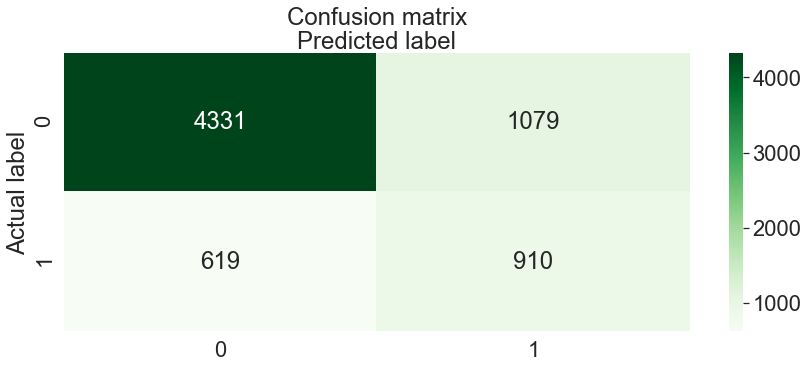

In [83]:
prepare_metrics('AdaBoost' , l_test,y_predict)

In [86]:
pd.DataFrame(final_report)

,Model,Accuracy,F1 Score
0,knn,0.728635,0.480552
1,SVM,0.768699,0.517583
2,Logistic Regression,0.768699,0.517583
3,Decision Tree,0.622712,0.399541
4,Random Forest,0.731518,0.511664
5,AdaBoost,0.755296,0.517339
